<a href="https://colab.research.google.com/github/lsmanoel/pythonLearningAndDeepLearning/blob/master/Tensorflow/Basic/MNIST_CNN_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST - CNN Approach

In [0]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

---

# Helper Functions

**Init Weights Functions**

In [0]:
def init_weights(shape):
  init_random_dist = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(init_random_dist)

**Init Bias Functions**

In [0]:
def init_bias(shape):
  init_bias_vals = tf.constant(0.1, shape=shape)
  return tf.Variable(init_bias_vals)

**Convolutional Functions**

In [0]:
def conv2d(x, w):
  # x --> [batch, hight, width, channels]
  # y --> [filter hight, filter width, channels in, channels out]
  
  return tf.nn.conv2d(x, w, strides=[1, 1, 1, 1], padding='SAME')

**Pooling Functions**

In [0]:
def max_pool_2x2(x):
  # x --> [batch, hight, width, channels]
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

---
# Placeholders

In [0]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_true = tf.placeholder(tf.float32, shape=[None, 10])
drop_prob_1 = tf.placeholder(tf.float32)

---
# Layers:




**Convolutional Layer Function:**

In [0]:
def convolutional_layer(input_x, shape):
  w = init_weights(shape)
  b = init_bias([shape[3]])
  return tf.nn.relu(conv2d(input_x, w) + b)

**Fully Connected Layer Function::**

In [0]:
def normal_full_layer(input_layer, size):
  input_size = int(input_layer.get_shape()[1])
  w = init_weights([input_size, size])
  b = init_bias([size])
  return tf.matmul(input_layer, w) + b

**Graph Structure Layers:**

In [0]:
x_image = tf.reshape(x, [-1, 28, 28, 1])

conv_kernel_layer_1 = convolutional_layer(x_image, shape=[5, 5, 1, 32])
conv_pooling_layer_1 = max_pool_2x2(conv_kernel_layer_1)

conv_kernel_layer_2 = convolutional_layer(conv_pooling_layer_1, shape=[5, 5, 32, 64])
conv_pooling_layer_2 = max_pool_2x2(conv_kernel_layer_2)

flat_layer = tf.reshape(conv_pooling_layer_2, [-1, 7*7*64])

fully_connected_layer_1 = tf.nn.relu(normal_full_layer(flat_layer, 1024))

dropout_layer_1 = tf.nn.dropout(fully_connected_layer_1, keep_prob=drop_prob_1)

y = normal_full_layer(dropout_layer_1, 10)

---
**Loss Function:**

**Surprisal:** Degree of surprise for a result obtained.
$$s = log\left(\frac{1}{y_j}\right)$$

**Entropy:** Weighted average of surprisals obtained. Since we know the probability of each outcome, this probability can be considered as the weight
$$e = \sum_{j=0}^{n} y_j \times log\left(\frac{1}{y_j}\right)$$

**Cross Entropy:** Weighted average of surprisals obtained. Now the weighting is reached by the real probability $y\_true_j$ (considering that the probability obtained, $y_j$, is not necessarily the correct one).
$$c = \sum_{j=0}^{n} y\_true_j \times log\left(\frac{1}{y_j}\right)$$
When the estimated probability distribution moves away from truel/desired probability distribution, cross entropy increases and vice-versa. That's why this formula is also called cross Cross Entropy Loss. The training process will attempt to minimize the Cross Entropy Loss.

In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, 
                                                                          logits=y))

**Optimizer:**

Adam -  Adaptive Moment Estimation.

Algorithmor for first-order gradient-based optimization of
stochastic  objective  functions.

[More about Adam](https://arxiv.org/pdf/1412.6980.pdf)


In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

# Process Session

**Init Variables:**

In [0]:
init = tf.global_variables_initializer()


**Session:**

[0]	 On Step: 0	||Accuracy: 0.13 AccProgRate: 1.000000||TimeStamp: 9.04 TimeRate: 0.00
-----------------------------------------------------------------------------
[1]	 On Step: 50	||Accuracy: 0.86 AccProgRate: 0.014630||TimeStamp: 25.37 TimeRate: 16.33
-----------------------------------------------------------------------------
[2]	 On Step: 100	||Accuracy: 0.92 AccProgRate: 0.000607||TimeStamp: 41.69 TimeRate: 16.31
-----------------------------------------------------------------------------
[3]	 On Step: 150	||Accuracy: 0.94 AccProgRate: 0.000139||TimeStamp: 58.06 TimeRate: 16.38
-----------------------------------------------------------------------------
[4]	 On Step: 200	||Accuracy: 0.95 AccProgRate: 0.000047||TimeStamp: 74.39 TimeRate: 16.33
-----------------------------------------------------------------------------
[5]	 On Step: 250	||Accuracy: 0.95 AccProgRate: 0.000018||TimeStamp: 90.70 TimeRate: 16.30
---------------------------------------------------------------------

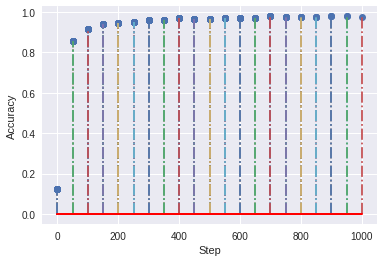

Final Accuracy: 0.9757000207901001||Time Stamp:336.4966950416565 seconds
-----------------------------------------------------------------------------


In [33]:
steps = 1000
print_step = 50

with tf.Session() as sess:
  
  sess.run(init)
  
  #-----------------------------------------------------------------------------
  #Train:
  timeStamp_list = []
  time_rate_list = []
  accuracy_list = []
  accuracy_rate_list = []
  steps_list = []
  accuracy_rate_list.append(1.0)
  time_rate_list.append(0.0)
  
  startTime = time.time()
  
  for i in range(steps+1):
    
    batch_x, batch_y = mnist.train.next_batch(50)
    
    sess.run(train, feed_dict={x:batch_x, y_true:batch_y, drop_prob_1:0.5})
    
    if i%print_step == 0:
      
      #-------------------------------------------------------------------------
      #Evaluation:
      correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
      
      #[1.0, 0.0, 1.0, ...] <--(cast to float) [True, False, True, ...]
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
      
      #-------------------------------------------------------------------------
      #Test:
      steps_list.append(i)
      accuracy_list.append(sess.run(accuracy, feed_dict={x:mnist.test.images, 
                                          y_true:mnist.test.labels,
                                          drop_prob_1:0.5}))
      
      timeStamp_list.append(time.time() - startTime)
      
      markerline, stemlines, baseline = plt.stem(steps_list, accuracy_list, '-.')     
      plt.setp(baseline, color='r', linewidth=2)
      
      if int(i/print_step)>0:
        accuracy_rate_list.append((accuracy_list[int(i/print_step)] - accuracy_list[int(i/print_step)-1])/i)
        time_rate_list.append(timeStamp_list[int(i/print_step)] - timeStamp_list[int(i/print_step)-1])
        
      print("[{}]\t On Step: {}\t||Accuracy: {:.2f} AccProgRate: {:.6f}||TimeStamp: {:.2f} TimeRate: {:.2f}".format(int(i/print_step), 
                                                                          i, 
                                                                          accuracy_list[int(i/print_step)],
                                                                          accuracy_rate_list[int(i/print_step)],
                                                                          timeStamp_list[int(i/print_step)],
                                                                          time_rate_list[int(i/print_step)]))
      print("-----------------------------------------------------------------------------")
  
  plt.ylabel('Accuracy')
  plt.xlabel('Step')
  plt.show()
  print("Final Accuracy: {}||Time Stamp:{} seconds".format(accuracy_list[int(i/print_step)], 
                                                   timeStamp_list[int(i/print_step)]))
  print("-----------------------------------------------------------------------------")
  print("=============================================================================")